# Comprehensive Analysis of Target’s Retail Ecosystem: Insights into Sales, Customers, and Operations (2016–2018)

This project examines a wide range of performance metrics for Target, a leading retailer in the United States and a globally recognized brand, to derive actionable insights across multiple dimensions of its operations from 2016 to 2018. Utilizing a dataset sourced from Kaggle, the analysis addresses critical questions related to customer behavior, sales performance, product trends, and operational efficiencies, among other areas. These findings provide essential metrics to inform strategic business decisions in real-world retail scenarios.

Please find the Relevant Details Below:

Dataset: https://www.kaggle.com/datasets/devarajv88/target-dataset?select=products.csv

Analytical Goals of this Project:

Basic Analysis
1. List all unique cities where customers are located.
2. Count the number of orders placed in 2017.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state. 

Intermediate Analysis
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

Advanced Analysis
1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.


# Dumping The CSV Files Downloaded from the Dataset Link above to an already created MySQL Database "ecommerce" using Python:

In [ ]:
# Code to Dump CSV Files in MySQL server:

import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='user',
    password='******',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/MeSud/OneDrive/Desktop/Data Analytics Projects/SQL & Python/Dataset'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64



# Importing Required Libraries and Connecting to the concerned MySQL Database:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Connecting to MySQL Database using a variable "mydb":
mydb = mysql.connector.connect(host = "localhost",
                              user = "root",
                              password = "***",
                              database = "ecommerce")

# Create a cursor Object to run SQL queries through Python:
cur = mydb.cursor()

# 1. Basic Analysis. 

## 1.1 List all unique cities where customers are located.

In [3]:
# Putting a query inside a variable "query" to use in cursor:
query = """SELECT DISTINCT customer_city FROM customers"""

cur.execute(query)

# Now, storing all the fetched data inside data variable in the form of a list:
data = cur.fetchall()

# This prints the list data:
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

## 1.2 Count the number of orders placed in 2017. 

In [4]:
query = """SELECT COUNT(DISTINCT order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""

# Executing the above query with cursor:
cur.execute(query)

# Storing the return of the query in 'data' variable:
data = cur.fetchall()

# Calling the first index of the list, and first index within it which is a tuple:
print("Total Unique Orders in 2017: ")
data[0][0]

Total Unique Orders in 2017: 


45101

## 1.3 Find the total sales per category. 

In [5]:
# Using double inner join between products, order_items, and payments tables:
query = """SELECT products.product_category category, round(SUM(payments.payment_value),2) AS Total_value 
FROM products JOIN order_items ON products.product_id = order_items.product_id 
JOIN payments ON order_items.order_id = payments.order_id GROUP BY category"""

cur.execute(query)

data = cur.fetchall()

# Putting this data inside a DataFrame using pandas we get:
df = pd.DataFrame(data, columns = ["Category", "Total Sales Value"])

# Calling the DataFrame:
df

,Category,Total Sales Value
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


## 1.4 Calculate the percentage of orders that were paid in installments.

In [6]:
query = """SELECT round((SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END)*100.0) / COUNT(*),2) FROM payments"""

# Executing the query with Cursor:
cur.execute(query)

# Storing the Data in "data" Variable:
data = cur.fetchall()
"The Percentage of People that made payment in installments is: ", data[0][0]

('The Percentage of People that made payment in installments is: ',
 Decimal('49.42'))

## 1.5 Count the number of customers from each state.

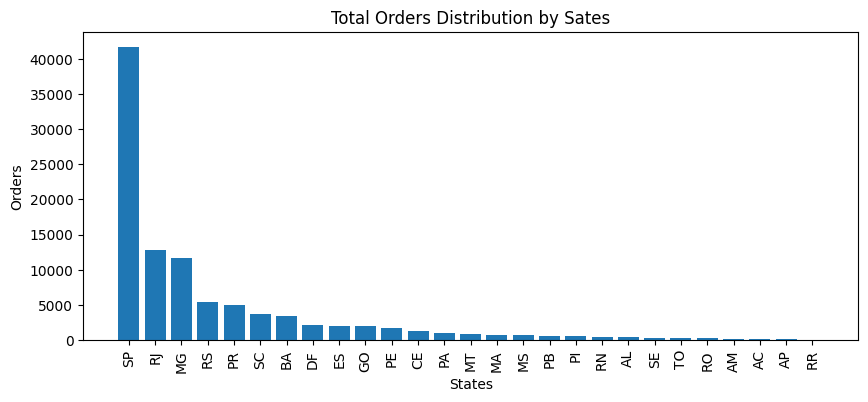

In [7]:
query = """SELECT COUNT(DISTINCT customer_id) no_of_customers, customer_state
FROM customers GROUP BY customer_state ORDER BY no_of_customers DESC"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["No. of Customers", "State"])

# plt.figure for maximizing the graph size(remember: This has to come before plt.bar):
plt.figure(figsize = (10,4))

# Plotting the graph:
plt.bar(df["State"], df["No. of Customers"])

# xticks used for rotating the labels of the x-axis:
plt.xticks(rotation = 90)

# Putting labels on X-axis and Y-axis and plot title:
plt.xlabel("States")
plt.ylabel("Orders")
plt.title("Total Orders Distribution by Sates")

plt.show()

# 2. Intermediate Analysis:

## 2.1 Calculate the number of orders per month in 2018.

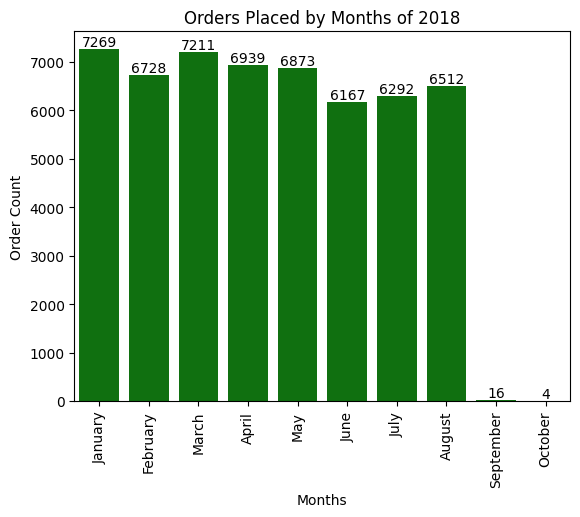

In [8]:
query = """SELECT MONTHNAME(order_purchase_timestamp) month, COUNT(DISTINCT order_id)
FROM orders WHERE YEAR(order_purchase_timestamp) = 2018 GROUP BY month"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Months", "Order Count"])

ord = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]

# Putting sns plot inside ax to further mark labels for each bar:
ax = sns.barplot(x = df["Months"], y = df["Order Count"], data = df, order = ord, color = "Green")

# putting labels on each bar:
ax.bar_label(ax.containers[0])

# Putting Chart Title:
plt.title("Orders Placed by Months of 2018")

plt.xticks(rotation = 90)
plt.show()

## 2.2 Find the average number of products per order, grouped by customer city.

In [12]:
query = """WITH count_per_order AS(SELECT orders.order_id, orders.customer_id AS cid, COUNT(order_items.order_id) AS oc FROM orders JOIN order_items
ON orders.order_id = order_items.order_id GROUP BY orders.order_id, cid)

SELECT customers.customer_city AS city, ROUND(AVG(count_per_order.oc),1) AS order_count FROM customers JOIN count_per_order ON customers.customer_id = count_per_order.cid
GROUP BY city ORDER BY order_count DESC"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["City", "Avg. items per order"])

df.head(10)

,City,Avg. items per order
0,padre carvalho,7.0
1,celso ramos,6.5
2,datas,6.0
3,candido godoi,6.0
4,matias olimpio,5.0
5,cidelandia,4.0
6,picarra,4.0
7,morro de sao paulo,4.0
8,teixeira soares,4.0
9,curralinho,4.0


## 2.3 Calculate the percentage of total revenue contributed by each product category.

In [23]:
query = """SELECT products.product_category AS category, 
ROUND(SUM(payments.payment_value)/(SELECT SUM(payment_value) FROM payments)*100,2) AS percentage_contb 
FROM products JOIN order_items ON products.product_id = order_items.product_id JOIN payments 
ON order_items.order_id = payments.order_id GROUP BY category ORDER BY percentage_contb DESC"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "% Contribution in Total Sales"])

df.head(10)

,Category,% Contribution in Total Sales
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,Garden tools,5.24
9,Cool Stuff,4.87


## 2.4 Identify the correlation between product price and the number of times a product has been purchased.

In [16]:
# Importing numpy library to use corrcoef() function for finding correlation between price and number of items puchased:
import numpy as np

query = """SELECT product_id, price, COUNT(product_id) FROM order_items GROUP BY product_id, price ORDER BY COUNT(product_id) DESC"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["prod_id", "price", "no_of_times_purchased"])

# Storing the required fields inside arrays to further use correlation function of numpy:
arr1 = df["price"]
arr2 = df["no_of_times_purchased"]

# correlation coefficient function (corrcoef) of numpy library:
np.corrcoef([arr1,arr2])

array([[ 1.        , -0.04421869],
       [-0.04421869,  1.        ]])

The -0.04421869 & -0.04421869 values are very close to 0, therefore denoting that no correlation can be established between the price of the 
product and the number of items purchased per order.

## 2.5 Calculate the total revenue generated by each seller, and rank them by revenue.

In [30]:
query = """WITH rank_seller AS (SELECT order_items.seller_id, ROUND(SUM(payments.payment_value),2) AS total_revenue FROM payments JOIN order_items 
ON order_items.order_id =payments.order_id GROUP BY order_items.seller_id)

SELECT *, DENSE_RANK() OVER(ORDER BY Total_revenue DESC) AS seller_rank FROM rank_seller"""

cur.execute(query)

data = cur.fetchall()

data
# To add chart:
# df = pd.DataFrame(data, columns = ["Seller Id", "Total Revenue", "Rank"])
# sns.barplot(x = "Seller Id", y = "Total Revenue", data = df.head())
# plt.show()

[('7c67e1448b00f6e969d365cea6b010ab', 507166.91, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 308222.04, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 301245.27, 3),
 ('1f50f920176fa81dab994f9023523100', 290253.42, 4),
 ('53243585a1d6dc2643021fd1853d8905', 284903.08, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 272219.32, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 264166.12, 7),
 ('955fee9216a65b617aa5c0531780ce60', 236322.3, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 206513.23, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 185134.21, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 179657.75, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 169030.8, 12),
 ('25c5c91f63607446a97b143d2d535d31', 160534.74, 13),
 ('a1043bafd471dff536d0c462352beb48', 154356.91, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 148864.34, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 145319.04, 16),
 ('620c87c171fb2a6dd6e8bb4dec959fc6', 145267.95, 17),
 ('cc419e0650a3c5ba77189a1882b7556a', 141309.58, 18),
 ('5dceca129747e92ff8ef7a997dc4f8ca', 1

# 3.Advanced Analysis

## 3.1 Calculate the moving average of order values for each customer over their order history

In [7]:
# We'll calculate the moving average for 3 consecutive payments for each customer_id:
query = """SELECT customer_id, order_purchase_timestamp, payval, ROUND(AVG(payval) OVER (PARTITION BY customer_id 
ORDER BY order_purchase_timestamp ROWS BETWEEN 2 PRECEDING AND CURRENT ROW),2) AS mov_avg FROM

(SELECT orders.customer_id, orders.order_purchase_timestamp, payments.payment_value AS payval FROM orders JOIN payments 
ON orders.order_id = payments.order_id) AS a ORDER BY customer_id"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Customer Id", "Purchase Timestamp", "Payment value", "Moving Average"])

df.head(50)

,Customer Id,Purchase Timestamp,Payment value,Moving Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.80
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.40
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.23
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.71


## 3.2 Calculate the cumulative sales per month for each year.

In [9]:
query = """SELECT year_no, month_nm, ROUND(mon_val,2) AS monthly_rev, ROUND(SUM(mon_val) OVER(PARTITION BY year_no 
ORDER BY year_no, month_no),2) AS cumm_sum_per_year FROM

(SELECT YEAR(orders.order_purchase_timestamp) AS year_no, MONTH(orders.order_purchase_timestamp) AS month_no, 
MONTHNAME(orders.order_purchase_timestamp) AS month_nm, SUM(payments.payment_value) AS mon_val FROM orders 
JOIN payments ON orders.order_id = payments.order_id GROUP BY year_no, month_no, year_no, month_nm) AS a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Year", "Month", "Monthly Rev.", "Cumm Sales/month"])

df

,Year,Month,Monthly Rev.,Cumm Sales/month
0,2016,September,252.24,252.24
1,2016,October,59090.48,59342.72
2,2016,December,19.62,59362.34
3,2017,January,138488.04,138488.04
4,2017,February,291908.01,430396.05
5,2017,March,449863.60,880259.65
6,2017,April,417788.03,1298047.68
7,2017,May,592918.82,1890966.50
8,2017,June,511276.38,2402242.88
9,2017,July,592382.92,2994625.80


## 3.3 Calculate the year-over-year growth rate of total sales.

In [12]:
query = """WITH a AS (SELECT YEAR(orders.order_purchase_timestamp) AS years, ROUND(SUM(payments.payment_value),2) AS payments
FROM orders JOIN payments ON orders.order_id = payments.order_id GROUP BY years)

SELECT years, payments, ((payments - LAG(payments,1) OVER(ORDER BY years))/LAG(payments,1) OVER (ORDER BY years))*100 AS YoY_Growth FROM a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Year", "Revenue", "YoY Growth %"])

df

,Year,Revenue,YoY Growth %
0,2016,59362.34,NaN
1,2017,7249746.73,12112.703761
2,2018,8699763.05,20.000924


## 3.4 Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [15]:
query = """WITH a AS (SELECT orders.customer_id AS cust_id, DATE(orders.order_purchase_timestamp) AS time_st, 
LAG(orders.order_purchase_timestamp,1) OVER (PARTITION BY orders.customer_id ORDER BY 
orders.order_purchase_timestamp) AS time_lag FROM orders ORDER BY cust_id)

SELECT (COUNT(DATEDIFF(time_st,time_lag))/COUNT(DISTINCT(cust_id)))*100 AS customer_retention_perc 
FROM a WHERE DATEDIFF(time_st,time_lag) <= 180"""


cur.execute(query)

data = cur.fetchall()

data

[(None,)]

Therefore, The Retention rate of customers within 6 Months in this dataset is 0

## 3.5 Identify the top 3 customers who spent the most money in each year.

                               Cust ID  Year  Total Spending
Rank                                                        
1     a9dc96b027d1252bbac0a9b72d837fc6  2016         1423.55
2     1d34ed25963d5aae4cf3d7f3a4cda173  2016         1400.74
3     4a06381959b6670756de02e07b83815f  2016         1227.78
1     1617b1357756262bfa56ab541c47bc16  2017        13664.08
2     c6e2731c5b391845f6800c97401a43a9  2017         6929.31
3     3fd6777bbce08a352fddd04e4a7cc8f6  2017         6726.66
1     ec5b2ba62e574342386871631fafd3fc  2018         7274.88
2     f48d464a0baaea338cb25f816991ab1f  2018         6922.21
3     e0a2412720e9ea4f26c1ac985f6a7358  2018         4809.44


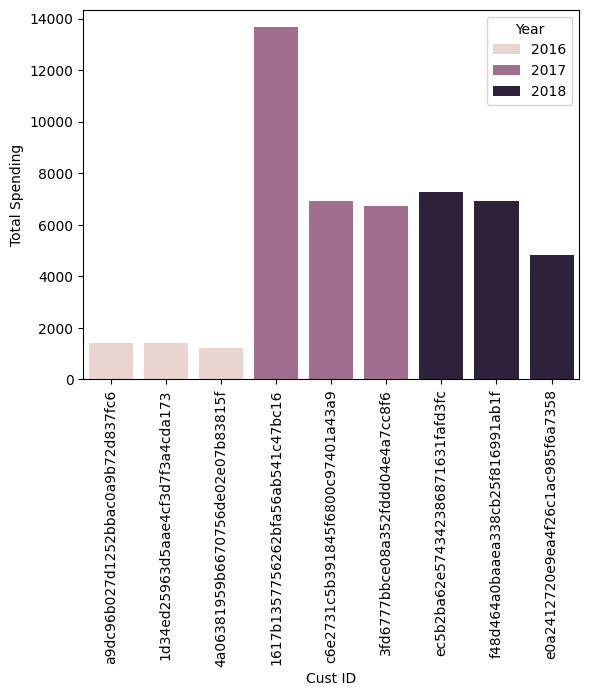

In [20]:
query = """WITH a AS (SELECT orders.customer_id AS cust_id, YEAR(orders.order_purchase_timestamp) years, 
ROUND(SUM(payments.payment_value),2) AS total_payment, ROW_NUMBER() OVER (PARTITION BY 
YEAR(orders.order_purchase_timestamp) ORDER BY SUM(payments.payment_value) DESC) AS rn FROM orders JOIN 
payments ON orders.order_id = payments.order_id GROUP BY cust_id, years ORDER BY total_payment DESC)

SELECT rn, cust_id, years, total_payment FROM a WHERE rn <= 3 ORDER BY years, rn"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Rank", "Cust ID", "Year", "Total Spending"])

# Setting the Rank Column as Row indexing to avoid confusion:
df = df.set_index("Rank")

print(df)

# Plotting the Data from better Visualization:
sns.barplot(x = "Cust ID", y = "Total Spending", data = df, hue = "Year")
plt.xticks(rotation = 90)
plt.show()